<a href="https://colab.research.google.com/github/FaithOsamaye/Students-Performance/blob/main/Student_Performance_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stud = pd.read_csv('/content/Student_Performance.csv')
stud.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
stud.shape

(10000, 6)

In [ ]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
stud.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<Axes: >

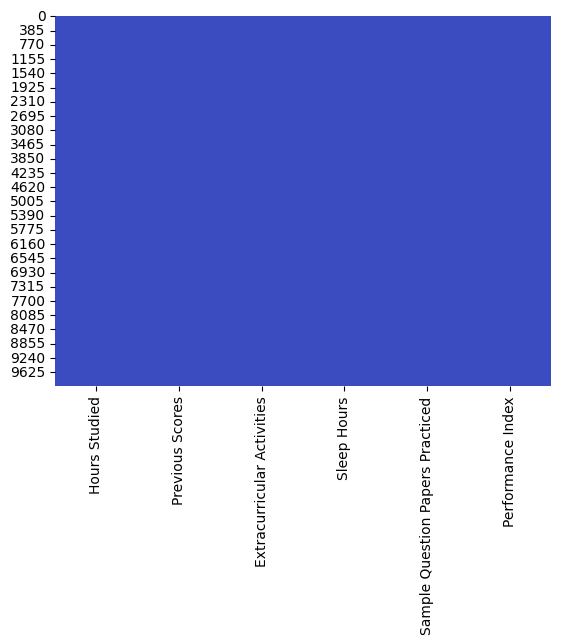

In [ ]:
sns.heatmap(stud.isnull(),cbar=False, cmap='coolwarm')

**Questions**

**1. How was the hours studied distributed amongst the students?**

In [ ]:
stud2=stud.copy()

In [ ]:
hours_bin= [0,3,5,10]
hours_label=['Little Effort(0-2)','Fair Effort(3-5)','Max Effort(6-10)']

stud2['hoursrange']= pd.cut(stud2['Hours Studied'],bins=hours_bin, labels=hours_label)

In [ ]:
hour_ranged=stud2['hoursrange'].value_counts()
fig = px.pie(values=hour_ranged.values, names=hour_ranged.index, color=hour_ranged.index, title='Hours Studied',
             color_discrete_map={'Little Effort(0-2)':'silver','Fair Effort(3-5)':'darksalmon','Max Effort(6-10)':'orchid'})
fig.show()

**Insights: Children who studied within 6 to 10 hours were more. followed by students who read for just 0 to 2 hours.**

**2. What is the percentage of students who performed in extracurricular activities?**

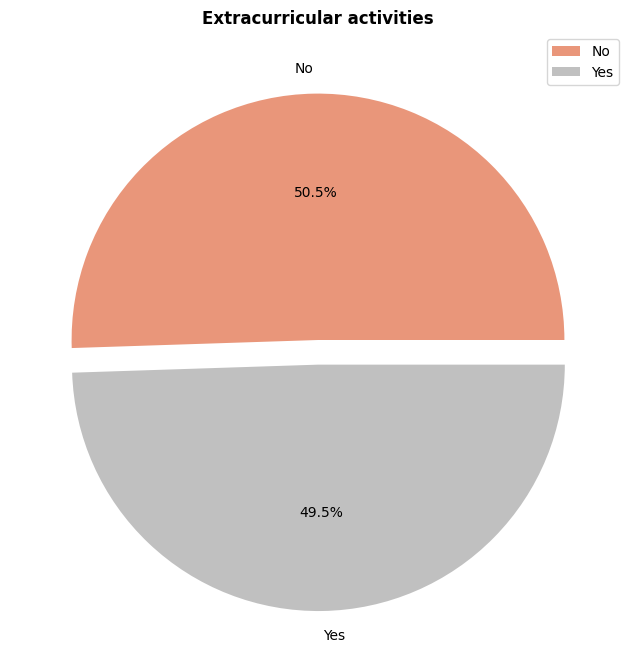

In [ ]:
plt.figure(figsize=(15,8))
explode = [0, 0.1]
col = ['darksalmon','silver']

extra= stud2['Extracurricular Activities'].value_counts()
plt.pie(extra.values,autopct='%1.1f%%',explode=explode,labels=extra.index,colors=col)
plt.title('Extracurricular activities',weight='bold')
plt.legend()
plt.show()

**Insights: The number of students who do not partake in extracurricular activities are more compared to the studnts who partake in these extracurricular activities.**

**3. Students who performed extracurricular activities, did they study for longer hours? were they also able to sleep for long?**

In [ ]:
sleep_bin= [0,5,10]
sleep_label=['Poor Sleep Hour(0-6)','Good Sleep Hour(7-10)']

stud2['sleeprange']= pd.cut(stud2['Sleep Hours'],bins=sleep_bin, labels=sleep_label)

Text(0.5, 1.0, 'Sleep vs Extracurricular Activity')

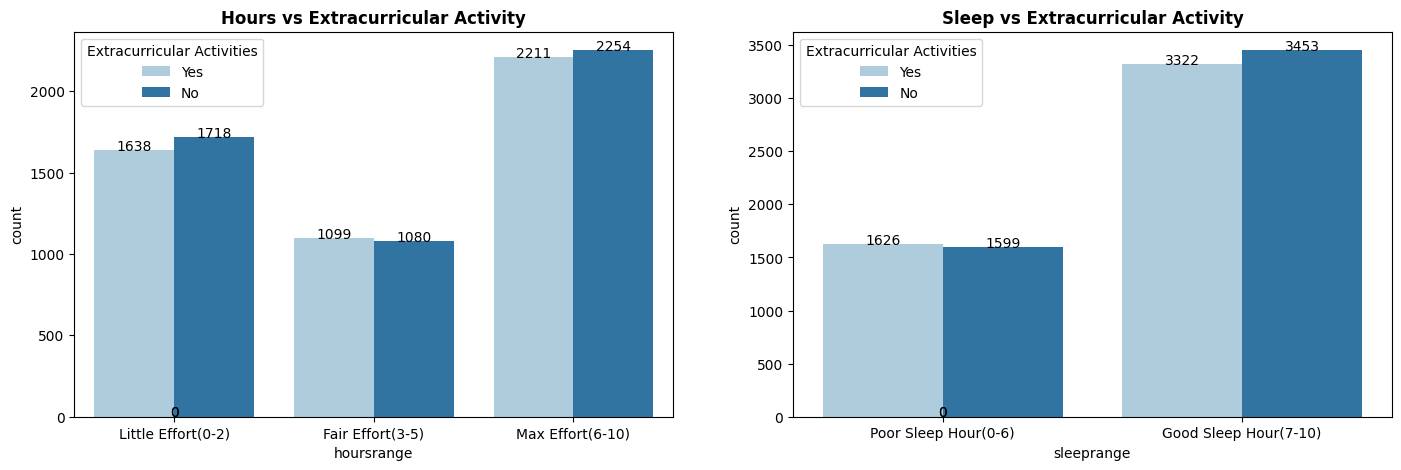

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(17,5))
ax = sns.countplot(x='hoursrange', hue = 'Extracurricular Activities',data=stud2, palette='Paired',ax=axes[0])
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
axes[0].set_title('Hours vs Extracurricular Activity', weight='bold')
ax = sns.countplot(x='sleeprange', hue = 'Extracurricular Activities',data=stud2, palette='Paired',ax=axes[1])
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
axes[1].set_title('Sleep vs Extracurricular Activity', weight='bold')

**Insights:Despite the fact that studwnts who put in max effort to study are more. they are also the students who partake in extracurricular activities the most. They also get good amount of sleep.Its safe to say they have good time management skills**

**4. Did sampling previous question help in their previous scores or did it help in their performance index?**

Text(0.5, 1.0, 'Performance Index vs Question Papers')

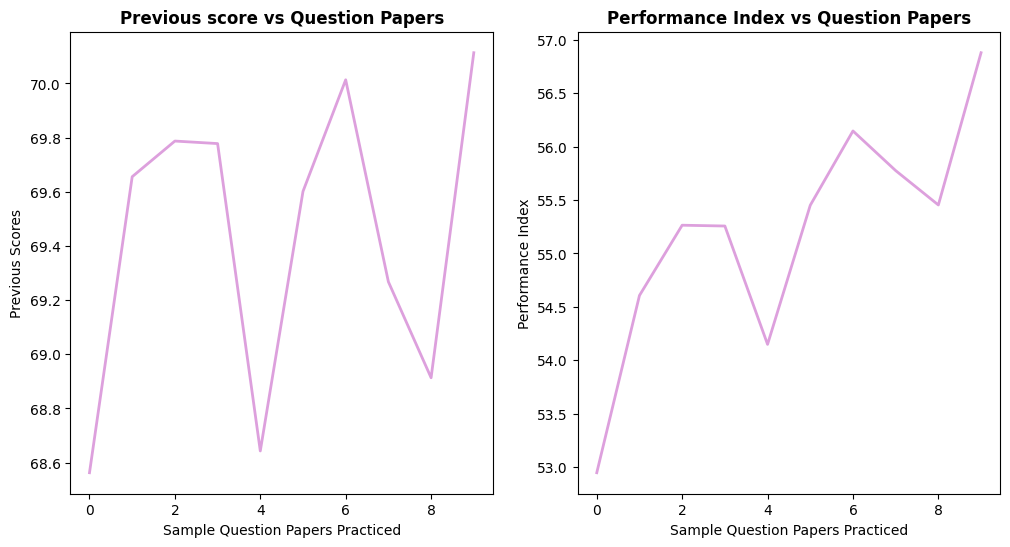

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
sns.lineplot(y='Previous Scores',x='Sample Question Papers Practiced',data=stud2,errorbar=None,ax=axes[0],lw=2,color='plum')
axes[0].set_title('Previous score vs Question Papers',weight='bold')
sns.lineplot(y='Performance Index',x='Sample Question Papers Practiced',data=stud2,errorbar=None,ax=axes[1],lw=2,color='plum')
axes[1].set_title('Performance Index vs Question Papers',weight='bold')

**Insights: Question papers sampled and previous score varied. It shows that the number of question paper sampled and the score had no relationship or even if it did, it had a little relationship.Take for instance, someone who read only one question paper scored better than one who read 4 papers and someone who read 8 papers.But for the performance index, It also flunctuated but not as badly as the previous score graph. It onky encountered dips in the 4 and 8 question papers. but saw a relative growth across other question paper numbers practiced.**

# **Unsupervised Learning- Clustering**

In [ ]:
#converting the object to numeric
stud['Extracurricular Activities'] = stud['Extracurricular Activities'].map({'Yes':1,'No':0})

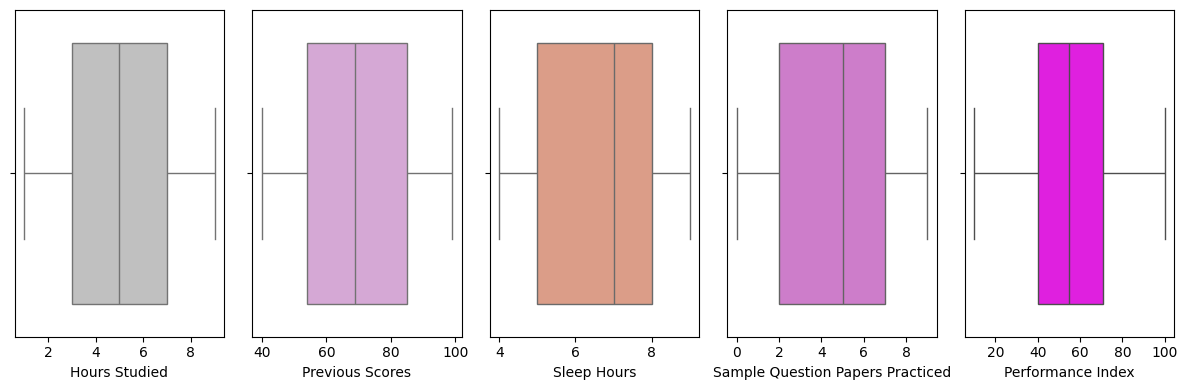

In [ ]:
#Looking for outliers
fig,axes=plt.subplots(1,5,figsize=(12,4))
sns.boxplot(x='Hours Studied',data=stud,color='silver',ax=axes[0])
sns.boxplot(x='Previous Scores',data=stud,color='plum',ax=axes[1])
sns.boxplot(x='Sleep Hours',data=stud,color='darksalmon',ax=axes[2])
sns.boxplot(x='Sample Question Papers Practiced',data=stud,color='orchid',ax=axes[3])
sns.boxplot(x='Performance Index',data=stud,color='magenta',ax=axes[4])
plt.tight_layout()

**Insights: There are no outliers**

In [ ]:
#Importing our libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as hc
from sklearn.preprocessing import StandardScaler

**K-Means Clustering**

In [ ]:
#tryinng to find a good k value
k_rng = range(1,5)

sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(stud)
  sse.append(km.inertia_)


Text(0, 0.5, 'sse list')

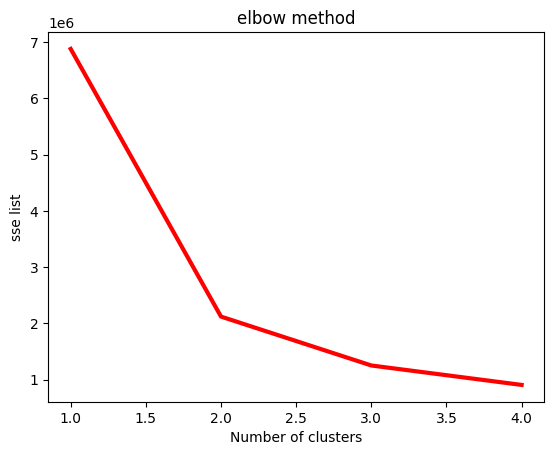

In [ ]:
plt.plot(k_rng,sse,lw=3,color='red')
plt.title('elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('sse list')


In [ ]:
#Create an isntance of KMeans
k_mean = KMeans(n_clusters=2)

#Working with the two columns with max outliers
y_pred = k_mean.fit_predict(stud)

In [ ]:
stud['clusters'] = y_pred

In [ ]:
stud.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,clusters
0,7,99,1,9,1,91.0,0
1,4,82,0,4,2,65.0,0
2,8,51,1,7,2,45.0,1
3,5,52,1,5,2,36.0,1
4,7,75,0,8,5,66.0,0


In [ ]:
print(f'The silhouette score is:', round(silhouette_score(stud, y_pred),2))

The silhouette score is: 0.56


In [ ]:
#We need to scale the features to see if we can get better silhoutte score
scale = StandardScaler()
studd = stud.copy()
studd[['Hours Studied',	'Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']]= scale.fit_transform(studd[['Hours Studied',	'Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']])

studd.drop('clusters', axis=1,inplace=True)

In [ ]:
#Create an isntance of KMeans
k_mean = KMeans(n_clusters=2)

#Working with the two columns with max outliers
y_preds = k_mean.fit_predict(studd)


In [ ]:
studd['clusters'] = y_preds

In [ ]:
studd.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,clusters
0,0.775188,1.704176,1,1.456205,-1.249754,1.862167,0
1,-0.383481,0.723913,0,-1.492294,-0.900982,0.508818,0
2,1.161410,-1.063626,1,0.276805,-0.900982,-0.532220,1
3,0.002742,-1.005963,1,-0.902594,-0.900982,-1.000687,1
4,0.775188,0.320275,0,0.866505,0.145333,0.560870,0


In [ ]:
print(f'The new silhouette score is:', round(silhouette_score(studd, y_preds),2))

The new silhouette score is: 0.28


**Insights: Using the data as it is , gives us a better silhouette score(56%). Hence, there is no need to scale it. The best k value is 2.**

**2. Hierarchial Clustering**

In [ ]:
stud_heir=stud.copy()

stud_heir.drop('clusters',axis=1,inplace=True)

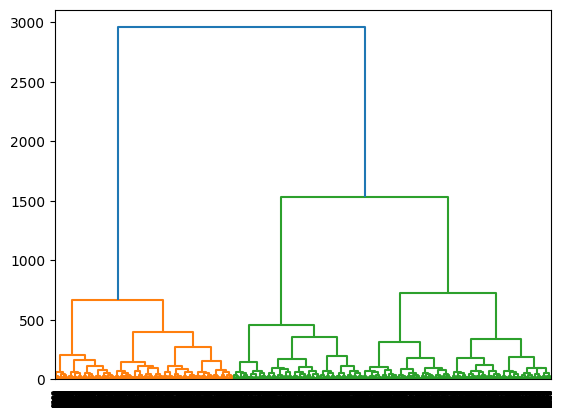

In [ ]:
dendogram=hc.dendrogram(hc.linkage(stud_heir,method='ward'))

In [ ]:
#Build hierarchial with optimal no. cluster.

from sklearn.cluster import AgglomerativeClustering
model  = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [ ]:
#Fit the model
heir_pred = model.fit_predict(stud_heir)

stud_heir['heir_clustered'] = heir_pred

In [ ]:
print(f'The silhouette heir score is:', round(silhouette_score(stud_heir, heir_pred),2))

The silhouette heir score is: 0.51


**Insights: The heirarchial score is 51%, the kmeans score was 56%.**

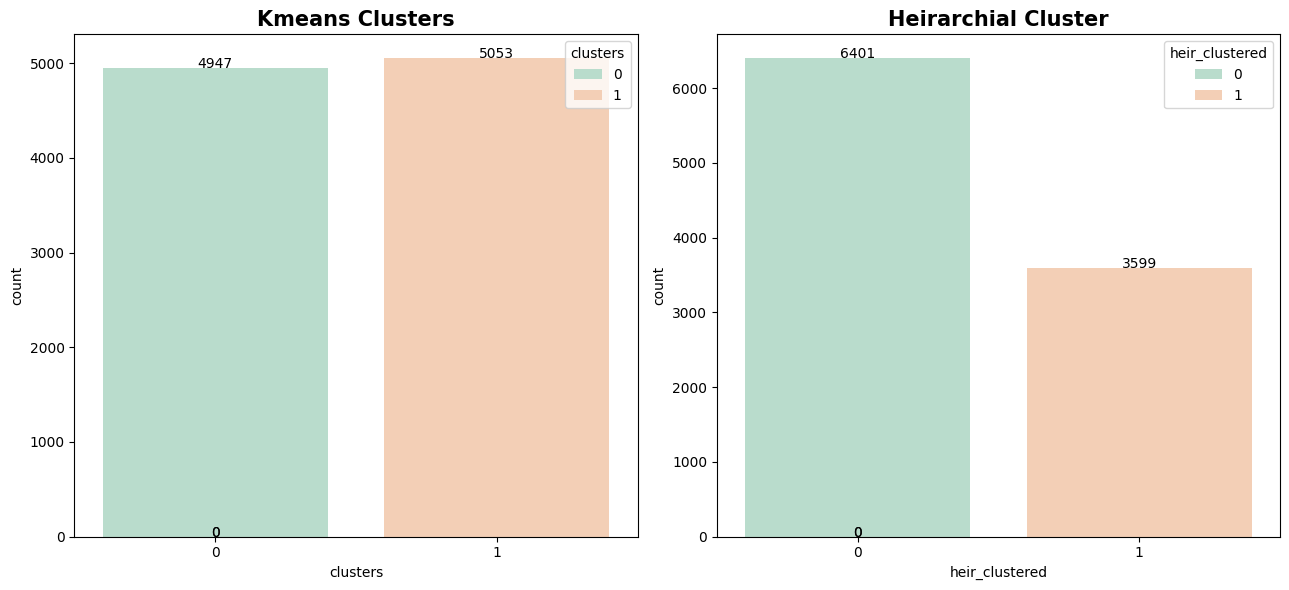

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(13,6))
ax1=sns.countplot(x='clusters', hue='clusters',data=stud, ax=axes[0],palette='Pastel2')
for p in ax1.patches:
  height =p.get_height()
  ax1.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
axes[0].set_title('Kmeans Clusters', weight='bold', fontsize=15)
ax2=sns.countplot(x='heir_clustered', hue='heir_clustered',data=stud_heir, ax=axes[1],palette='Pastel2')
for p in ax2.patches:
  height =p.get_height()
  ax2.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
axes[1].set_title('Heirarchial Cluster', weight='bold', fontsize=15)

plt.tight_layout()

**Insights: The difference between the clustering in the kmeans and heirarchial clustering is very significant.**